## Code started by Angie

### Question:
* What is growth rate of breweries over time for each state?
* How does growth rate change when normalized to population, land mass, or average income?

### Data Sources:
* Brewery number per state per year: https://www.ttb.gov/foia/frl.shtml (file name q4_brewery_count_by_state_1984_dec2018.xls)
* Population per state per year: 
* Size of each state in square miles:
* Average income per state per year:

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv



In [67]:
#Convert Excel file to dataframe; parameters: skip rows 0-6, then use new rows 0-1 as headers, define data types
data_org_df = pd.read_excel('../Raw Data Sources/q4_brewery_count_by_state_1984_dec2018.xls', 'FOIA Page', header = [0], 
                         skiprows = [0,1,2,3,4,5,6,8])
#data_xls.to_csv('your_csv.csv', encoding='utf-8')
data_org_df


,Unnamed: 0,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AK,NaN,NaN,NaN,NaN,NaN,*,*,3,4,...,18,20.0,23,25.0,25.0,28.0,35.0,36.0,45.0,51.0
1,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*,...,5,7.0,9,15.0,23.0,25.0,30.0,37.0,52.0,55.0
2,AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*,...,5,5.0,7,13.0,18.0,23.0,29.0,34.0,44.0,53.0
3,AZ,NaN,NaN,NaN,NaN,*,6,8,8,7,...,34,37.0,45,55.0,59.0,77.0,91.0,110.0,130.0,146.0
4,CA,9,12,15,23,39,50,67,76,93,...,340,358.0,401,472.0,528.0,654.0,788.0,927.0,1106.0,1236.0
5,CO,NaN,NaN,NaN,NaN,3,7,11,22,27,...,116,129.0,149,185.0,234.0,300.0,352.0,386.0,448.0,500.0
6,CT,NaN,NaN,NaN,NaN,NaN,*,*,*,*,...,19,21.0,20,24.0,39.0,50.0,59.0,76.0,103.0,124.0
7,DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*,...,3,4.0,6,5.0,11.0,12.0,13.0,13.0,13.0,13.0
8,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11,11.0,12,13.0,13.0,15.0,21.0,25.0,33.0,38.0
9,FL,*,*,*,*,3,6,7,13,17,...,52,60.0,71,89.0,113.0,158.0,205.0,264.0,338.0,386.0


In [112]:
#Cleaning up dataframe: drop bottom 4 rows with no data
data_df = data_org_df[0:53]
#Drop index [51] (other US territories), as it won't be included in analysis
data_df = data_df.drop([51])
#Clean up column headers
data_df = data_df.rename(columns = {"Unnamed: 0" : "State Code"})
#Replace NaN with zero
data_df = data_df.fillna(0)
#Replace * with zero
data_df = data_df.replace({'*' : 0})
    
data_df.head()

,State Code,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AK,0,0,0,0,0,0,0,3,4,...,18,20.0,23,25.0,25.0,28.0,35.0,36.0,45.0,51.0
1,AL,0,0,0,0,0,0,0,0,0,...,5,7.0,9,15.0,23.0,25.0,30.0,37.0,52.0,55.0
2,AR,0,0,0,0,0,0,0,0,0,...,5,5.0,7,13.0,18.0,23.0,29.0,34.0,44.0,53.0
3,AZ,0,0,0,0,0,6,8,8,7,...,34,37.0,45,55.0,59.0,77.0,91.0,110.0,130.0,146.0
4,CA,9,12,15,23,39,50,67,76,93,...,340,358.0,401,472.0,528.0,654.0,788.0,927.0,1106.0,1236.0


In [90]:
#Import csv file with US Census regions and divisions to allow sorting by subsets of states
#File from https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv
state_region_df = pd.read_csv('../Raw Data Sources/us_census_regions_divisions.csv', delimiter = ',',  encoding='utf-8')
state_region_df.head()

#Merge dataframes on State Code
brew_ct_df = pd.merge(state_region_df,data_df, on = "State Code")
brew_ct_df.head()


,State,State Code,Region,Division,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alaska,AK,West,Pacific,0,0,0,0,0,0,...,18,20.0,23,25.0,25.0,28.0,35.0,36.0,45.0,51.0
1,Alabama,AL,South,East South Central,0,0,0,0,0,0,...,5,7.0,9,15.0,23.0,25.0,30.0,37.0,52.0,55.0
2,Arkansas,AR,South,West South Central,0,0,0,0,0,0,...,5,5.0,7,13.0,18.0,23.0,29.0,34.0,44.0,53.0
3,Arizona,AZ,West,Mountain,0,0,0,0,0,6,...,34,37.0,45,55.0,59.0,77.0,91.0,110.0,130.0,146.0
4,California,CA,West,Pacific,9,12,15,23,39,50,...,340,358.0,401,472.0,528.0,654.0,788.0,927.0,1106.0,1236.0


In [122]:
#Sort data by region

region_df = brew_ct_df.sort_values("Region")
region_df # Midwest (12), Northeast (9), South (17), West (13)

,State,State Code,Region,Division,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
28,North Dakota,ND,Midwest,West North Central,0,0,0,0,0,0,...,3,3.0,3,7.0,8.0,10.0,11.0,15.0,22.0,26.0
35,Ohio,OH,Midwest,East North Central,0,0,0,0,3,5,...,66,75.0,81,99.0,114.0,151.0,187.0,236.0,324.0,377.0
15,Indiana,IN,Midwest,East North Central,0,0,0,0,0,4,...,39,43.0,59,72.0,95.0,116.0,151.0,163.0,213.0,234.0
48,Wisconsin,WI,Midwest,East North Central,5,6,7,10,12,14,...,108,119.0,126,146.0,146.0,168.0,189.0,217.0,261.0,303.0
41,South Dakota,SD,Midwest,West North Central,0,0,0,0,0,0,...,7,8.0,9,12.0,12.0,15.0,19.0,21.0,28.0,35.0
14,Illinois,IL,Midwest,East North Central,0,0,0,0,4,5,...,60,62.0,68,95.0,123.0,164.0,210.0,244.0,291.0,338.0
29,Nebraska,NE,Midwest,West North Central,0,0,0,0,0,0,...,17,16.0,18,20.0,25.0,35.0,39.0,47.0,53.0,60.0
16,Kansas,KS,Midwest,West North Central,0,0,0,0,0,0,...,17,17.0,21,21.0,25.0,27.0,37.0,47.0,53.0,64.0
24,Missouri,MO,Midwest,West North Central,0,0,0,0,0,0,...,47,51.0,55,60.0,63.0,77.0,90.0,116.0,145.0,168.0
23,Minnesota,MN,Midwest,West North Central,0,0,3,4,5,7,...,39,42.0,56,70.0,75.0,113.0,142.0,165.0,214.0,239.0


In [121]:
#Sort data by Division
division_df = brew_ct_df.sort_values("Division")
division_df 
# Divisions are: East North Central (5), East South Central (4), Middle Atlantic (3), Mountain (8), 
# New England (6), Pacific (5), South Atlantic (9), West North Central (7), West South Central (4)



,State,State Code,Region,Division,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
48,Wisconsin,WI,Midwest,East North Central,5,6,7,10,12,14,...,108,119.0,126,146.0,146.0,168.0,189.0,217.0,261.0,303.0
35,Ohio,OH,Midwest,East North Central,0,0,0,0,3,5,...,66,75.0,81,99.0,114.0,151.0,187.0,236.0,324.0,377.0
22,Michigan,MI,Midwest,East North Central,0,0,0,0,3,3,...,104,111.0,131,160.0,195.0,256.0,316.0,379.0,452.0,510.0
14,Illinois,IL,Midwest,East North Central,0,0,0,0,4,5,...,60,62.0,68,95.0,123.0,164.0,210.0,244.0,291.0,338.0
15,Indiana,IN,Midwest,East North Central,0,0,0,0,0,4,...,39,43.0,59,72.0,95.0,116.0,151.0,163.0,213.0,234.0
25,Mississippi,MS,South,East South Central,0,0,0,0,0,0,...,0,3.0,0,4.0,7.0,10.0,14.0,14.0,16.0,19.0
1,Alabama,AL,South,East South Central,0,0,0,0,0,0,...,5,7.0,9,15.0,23.0,25.0,30.0,37.0,52.0,55.0
42,Tennessee,TN,South,East South Central,0,0,0,0,0,0,...,23,26.0,31,45.0,51.0,69.0,88.0,101.0,120.0,140.0
17,Kentucky,KY,South,East South Central,0,0,0,0,0,0,...,15,14.0,21,25.0,25.0,38.0,48.0,60.0,73.0,86.0
38,Pennsylvania,PA,Northeast,Middle Atlantic,4,4,5,6,6,8,...,96,118.0,146,162.0,183.0,233.0,278.0,333.0,411.0,472.0


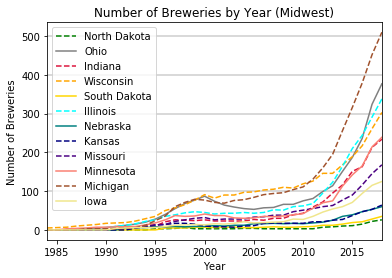

In [199]:
#use for loop to generate a list of year covered in the table; these will be the reference for the x axis labels
iyear = 1984
years = []
for i in range(35):
    iyear = 1984 + i
    years.append(iyear)
years
#Create a list of name for this region (row 0-11)
breweries_midwest_name = region_df.iloc[0:12, 0].values.tolist()
# Names: ['North Dakota','Ohio', 'Indiana', 'Wisconsin', 'South Dakota', 'Illinois', 'Nebraska', 'Kansas', 
# 'Missouri','Minnesota', 'Michigan', 'Iowa']
#Make and format plot
plt.plot(years, region_df.iloc[0, 4:], 'k--',  color = "green", label = "North Dakota")
plt.plot(years, region_df.iloc[1, 4:], 'k-',  color = "grey", label = "Ohio")
plt.plot(years, region_df.iloc[2, 4:], 'k--',  color = "crimson", label = "Indiana")
plt.plot(years, region_df.iloc[3, 4:], 'k--',  color = "orange", label = "Wisconsin")
plt.plot(years, region_df.iloc[4, 4:], 'k-',  color = "gold", label = "South Dakota")
plt.plot(years, region_df.iloc[5, 4:], 'k--',  color = "aqua", label = "Illinois")
plt.plot(years, region_df.iloc[6, 4:], 'k-',  color = "teal", label = "Nebraska")
plt.plot(years, region_df.iloc[7, 4:], 'k--',  color = "navy", label = "Kansas")
plt.plot(years, region_df.iloc[8, 4:], 'k--',  color = "indigo", label = "Missouri")
plt.plot(years, region_df.iloc[9, 4:], 'k-',  color = "salmon", label = "Minnesota")
plt.plot(years, region_df.iloc[10, 4:], 'k--',  color = "sienna", label = "Michigan")
plt.plot(years, region_df.iloc[11, 4:], 'k-',  color = "khaki", label = "Iowa")
plt.hlines(100, 1984, 2020, alpha = 0.2)
plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(300, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(500, 1984, 2020, alpha = 0.2)
plt.legend()
plt.title("Number of Breweries by Year (Midwest)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/midwest_breweries.png")
plt.show()


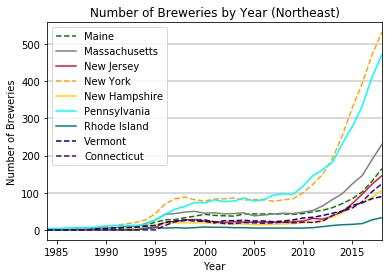

In [168]:
#Create a list of name for this region (row 12-20)
breweries_NE_name = region_df.iloc[12:21, 0].values.tolist()
# Names: ['Maine', 'Massachusetts', 'New Jersey', 'New York', 'New Hampshire', 'Pennsylvania', 'Rhode Island',
# 'Vermont', 'Connecticut']
#Make and format plot
plt.plot(years, region_df.iloc[12, 4:], 'k--',  color = "green", label = "Maine")
plt.plot(years, region_df.iloc[13, 4:], 'k-',  color = "grey", label = "Massachusetts")
plt.plot(years, region_df.iloc[14, 4:], 'k-',  color = "crimson", label = "New Jersey")
plt.plot(years, region_df.iloc[15, 4:], 'k--',  color = "orange", label = "New York")
plt.plot(years, region_df.iloc[16, 4:], 'k-',  color = "gold", label = "New Hampshire")
plt.plot(years, region_df.iloc[17, 4:], 'k-',  color = "aqua", label = "Pennsylvania")
plt.plot(years, region_df.iloc[18, 4:], 'k-',  color = "teal", label = "Rhode Island")
plt.plot(years, region_df.iloc[19, 4:], 'k--',  color = "navy", label = "Vermont")
plt.plot(years, region_df.iloc[20, 4:], 'k--',  color = "indigo", label = "Connecticut")
plt.hlines(100, 1984, 2020, alpha = 0.2)
plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(300, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(500, 1984, 2020, alpha = 0.2)
plt.legend()
plt.title("Number of Breweries by Year (Northeast)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/northeast_breweries.png")
plt.show()



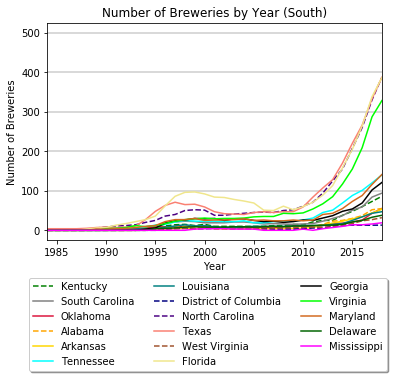

In [188]:
#Create a list of name for this region (row 21-37)
breweries_south_name = region_df.iloc[21:38, 0].values.tolist()
# Names: ['Kentucky', 'South Carolina', 'Oklahoma', 'Alabama', 'Arkansas', 'Tennessee', 'Louisiana',
#'District of Columbia', 'North Carolina', 'Texas', 'West Virginia', 'Florida', 'Georgia', 'Virginia',
#'Maryland', 'Delaware', 'Mississippi']
#Make and format plot
plt.plot(years, region_df.iloc[21, 4:], 'k--',  color = "green", label = "Kentucky")
plt.plot(years, region_df.iloc[22, 4:], 'k-',  color = "grey", label = "South Carolina")
plt.plot(years, region_df.iloc[23, 4:], 'k-',  color = "crimson", label = "Oklahoma")
plt.plot(years, region_df.iloc[24, 4:], 'k--',  color = "orange", label = "Alabama")
plt.plot(years, region_df.iloc[25, 4:], 'k-',  color = "gold", label = "Arkansas")
plt.plot(years, region_df.iloc[26, 4:], 'k-',  color = "aqua", label = "Tennessee")
plt.plot(years, region_df.iloc[27, 4:], 'k-',  color = "teal", label = "Louisiana")
plt.plot(years, region_df.iloc[28, 4:], 'k--',  color = "navy", label = "District of Columbia")
plt.plot(years, region_df.iloc[29, 4:], 'k--',  color = "indigo", label = "North Carolina")
plt.plot(years, region_df.iloc[30, 4:], 'k-',  color = "salmon", label = "Texas")
plt.plot(years, region_df.iloc[31, 4:], 'k--',  color = "sienna", label = "West Virginia")
plt.plot(years, region_df.iloc[32, 4:], 'k-',  color = "khaki", label = "Florida")
plt.plot(years, region_df.iloc[33, 4:], 'k-',  color = "black", label = "Georgia")
plt.plot(years, region_df.iloc[34, 4:], 'k-',  color = "lime", label = "Virginia")
plt.plot(years, region_df.iloc[35, 4:], 'k-',  color = "chocolate", label = "Maryland")
plt.plot(years, region_df.iloc[36, 4:], 'k-',  color = "darkgreen", label = "Delaware")
plt.plot(years, region_df.iloc[37, 4:], 'k-',  color = "magenta", label = "Mississippi")

plt.hlines(100, 1984, 2020, alpha = 0.2)
plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(300, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(500, 1984, 2020, alpha = 0.2)

plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Breweries by Year (South)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/south_breweries.png", bbox_inches='tight')
plt.show()



In [192]:
breweries_west_name = region_df.iloc[38:51, 0].values.tolist()
breweries_west_name
# Names: ['Washington', 'Utah', 'Alaska', 'Nevada', 'New Mexico', 'Montana', 'Idaho', 'Hawaii',
# 'Colorado', 'California', 'Arizona', 'Oregon']

['Washington',
 'Utah',
 'Alaska',
 'Nevada',
 'New Mexico',
 'Montana',
 'Idaho',
 'Hawaii',
 'Colorado',
 'California',
 'Arizona',
 'Oregon',
 'Wyoming']

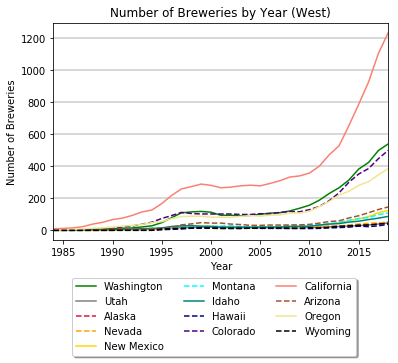

In [198]:
#Create a list of name for this region (row 38-50)
breweries_west_name = region_df.iloc[38:51, 0].values.tolist()
breweries_west_name
# Names: ['Washington', 'Utah', 'Alaska', 'Nevada', 'New Mexico', 'Montana', 'Idaho', 'Hawaii',
# 'Colorado', 'California', 'Arizona', 'Oregon', 'Wyoming']
#Make and format plot
plt.plot(years, region_df.iloc[38, 4:], 'k-',  color = "green", label = "Washington")
plt.plot(years, region_df.iloc[39, 4:], 'k-',  color = "grey", label = "Utah")
plt.plot(years, region_df.iloc[40, 4:], 'k--',  color = "crimson", label = "Alaska")
plt.plot(years, region_df.iloc[41, 4:], 'k--',  color = "orange", label = "Nevada")
plt.plot(years, region_df.iloc[42, 4:], 'k-',  color = "gold", label = "New Mexico")
plt.plot(years, region_df.iloc[43, 4:], 'k--',  color = "aqua", label = "Montana")
plt.plot(years, region_df.iloc[44, 4:], 'k-',  color = "teal", label = "Idaho")
plt.plot(years, region_df.iloc[45, 4:], 'k--',  color = "navy", label = "Hawaii")
plt.plot(years, region_df.iloc[46, 4:], 'k--',  color = "indigo", label = "Colorado")
plt.plot(years, region_df.iloc[47, 4:], 'k-',  color = "salmon", label = "California")
plt.plot(years, region_df.iloc[48, 4:], 'k--',  color = "sienna", label = "Arizona")
plt.plot(years, region_df.iloc[49, 4:], 'k-',  color = "khaki", label = "Oregon")
plt.plot(years, region_df.iloc[50, 4:], 'k--',  color = "black", label = "Wyoming")

plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(600, 1984, 2020, alpha = 0.2)
plt.hlines(800, 1984, 2020, alpha = 0.2)
plt.hlines(1000, 1984, 2020, alpha = 0.2)
plt.hlines(1200, 1984, 2020, alpha = 0.2)

plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Breweries by Year (West)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/west_breweries.png", bbox_inches='tight')
plt.show()



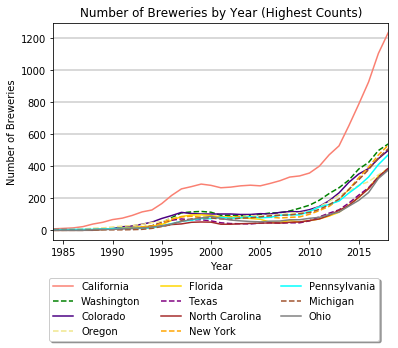

In [201]:
#Combine highest brewery values

#Make and format plot
plt.plot(years, region_df.iloc[47, 4:], 'k-',  color = "salmon", label = "California")
plt.plot(years, region_df.iloc[38, 4:], 'k--',  color = "green", label = "Washington")
plt.plot(years, region_df.iloc[46, 4:], 'k-',  color = "indigo", label = "Colorado")
plt.plot(years, region_df.iloc[49, 4:], 'k--',  color = "khaki", label = "Oregon")
plt.plot(years, region_df.iloc[32, 4:], 'k-',  color = "gold", label = "Florida")
plt.plot(years, region_df.iloc[30, 4:], 'k--',  color = "purple", label = "Texas")
plt.plot(years, region_df.iloc[29, 4:], 'k-',  color = "brown", label = "North Carolina")
plt.plot(years, region_df.iloc[15, 4:], 'k--',  color = "orange", label = "New York")
plt.plot(years, region_df.iloc[17, 4:], 'k-',  color = "aqua", label = "Pennsylvania")
plt.plot(years, region_df.iloc[10, 4:], 'k--',  color = "sienna", label = "Michigan")
plt.plot(years, region_df.iloc[1, 4:], 'k-',  color = "grey", label = "Ohio")

plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(600, 1984, 2020, alpha = 0.2)
plt.hlines(800, 1984, 2020, alpha = 0.2)
plt.hlines(1000, 1984, 2020, alpha = 0.2)
plt.hlines(1200, 1984, 2020, alpha = 0.2)

plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Breweries by Year (Highest Counts)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/highestcount_breweries.png", bbox_inches='tight')
plt.show()

